Testing Mushi
==

Here's a notebook for playing with the `mushi` module

In [1]:
%matplotlib inline
# %config InlineBackend.figure_format = 'svg'
from mushi import PiecewiseConstantHistory, JointHistory, SFS
import numpy as np
from matplotlib import pyplot as plt
from scipy.special import expit

In [2]:
print(PiecewiseConstantHistory.__doc__)
print(JointHistory.__doc__)
print(SFS.__doc__)

The first epoch starts at zero, and the last epoch extends to infinity.
    Can be used for η or μ

    change_points: epoch change points (times)
    vals: vector of constant values for each epoch
    
Piecewise constant history of population size η and mutation rate μ.
    both histories must use the same time grid

    η: effective population size history
    μ: mutation rate history
    
The SFS model described in the text
    


### demographic and mutation rate history

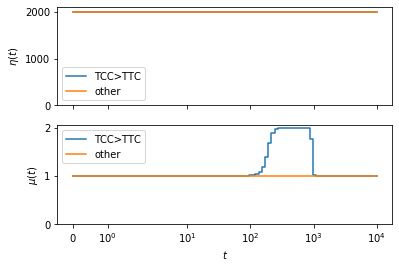

In [5]:
t = np.logspace(-1, 4, 100)

y = 2000 * np.ones(len(t) + 1)
η = PiecewiseConstantHistory(t, y)

z_flat = np.ones(len(t) + 1)
z_pulse = np.ones(len(t) + 1)
z_pulse[:-1] += (expit(.05 * (t - 200)) - expit(.05 * (t - 1000)))
μ_TCC = PiecewiseConstantHistory(t, z_pulse)
μ_other = PiecewiseConstantHistory(t, z_flat)

history_TCC = JointHistory(η, μ_TCC)
history_other = JointHistory(η, μ_other)

fig = history_TCC.plot(label='TCC>TTC')
history_other.plot(fig=fig, label='other')
plt.show()

### SFS

In [6]:
n = 50
sfs_TCC = SFS(n)
sfs_other = SFS(n)
sfs_TCC.simulate(history_TCC)
sfs_other.simulate(JointHistory(η, μ_other))

In [7]:
history_inferred = sfs_TCC.infer_μ(η, λ_μ=1e1, h=1e1)

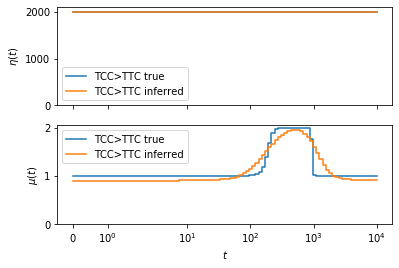

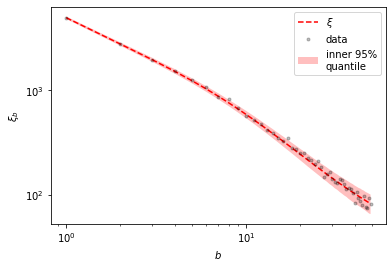

In [9]:
fig = history_TCC.plot(label='TCC>TTC true')
history_inferred.plot(fig=fig, label='TCC>TTC inferred')
plt.show()

sfs_TCC.plot(JointHistory(η, μ_TCC))
plt.show()